In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
# sys.path.append("/private/home/alexandrerame/domainbedv2/")
# sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2")
sys.path.append("/Users/alexandrerame/code_repository/dataplace/data/datafb/data")

from domainbed.codeplot import plot

plot.plt.rcParams["figure.figsize"] = (5, 5)
# plot.plt.rcParams['text.usetex'] = True
# plot.plt.rcParams['font.family'] = 'serif'
# plot.plt.rcParams['font.serif'] = 'Times Roman'
# plot.FORMAT_X=1
# plot.FORMAT_Y=3


In [2]:
from diwadinit import diwa_dnim_pacshome, diwa_fdnim_home
from diwadinit.home import home0_lmc_pacsdnim_filter


In [3]:
from diversity.home import home0_isit,  home0_idit, home0_idit_dnspec

from diwadinit.home import home0_llm_idit_filter, home0_llm_idit_rank


In [4]:
from diversity.home import home0_div_imdn0dn1_idit_step, home0_div_imdn0dn1_isit_step_top2
from diversity.terra import terra0_div_imdn_step
plot.MUL = 0
plot.SIZE = "large"


# Linear mode connectivity for fts with different inits

In [ ]:
list_indexes = None

fig_dr = plot.plot_key(
    home0_lmc_pacsdnim_filter.l[1:2],
    key_x="train_acc",
    key_y="acc",
    order=0,
    loc="lower right",
    list_indexes=list_indexes,
    colors=None,
    keysplit="1-weighting",
    labels="fromsplit",
    label="$\mu={:.2f}$",
    kwargs={"s": 200},
    lambda_filtering=lambda x: x["testenv"] == 0,
)
plot.save_fig(fig_dr, "diwa/fig_diwa_dnpacs_iid_vs_ood_home0_mean.pdf")


In [ ]:
list_indexes = None
fig_dr = plot.plot_key(
    diwa_dnim_pacshome.l[3:4],
    key_x="train_acc",
    key_y="acc",
    order=0,
    loc="lower right",
    list_indexes=list_indexes,
    #keycolor="1-weighting",
    colors=None,
    keysplit="1-weighting",
    labels="fromsplit",
    label="$\mu={:.2f}$",
    lambda_filtering=lambda x: x["dirs"].startswith("home") and x["testenv"] == 0,
    kwargs={"s": 200}
    #    title="Lack of IID-OOD correlation when WA from multiple inits"
)
plot.save_fig(fig_dr, "diwa/fig_diwa_dnim_iid_vs_ood_home0_mean.pdf")


In [ ]:
# list_indexes = 0+np.array([0, 3, 6, 9])
# list_indexes = 0+np.array([0, 3, 4, 5])
# list_indexes = 0+np.array([12, 13, 14, 15, 16, 17])
# fig_dr = plot.plot_key(
#     home0_llm_idit_rank.l, key1="weighting", key2="acc", labels=home0_llm_idit_rank.labels, order=2, loc="lower left",
#     list_indexes=list_indexes
# )


# Diwa or recycling ?

In [ ]:
list_indexes = None
fig_dr = plot.plot_key(
    diwa_dnim_pacshome.l,
    key_x="1-weighting",
    key_y="acc",
    #keyerror="acc_std",
    labels=['$M=20$', '$M=16$', '$M=12$', '$M=8$', '$M=4$', '$M=2$'],
    order=2,
    loc="lower left",
    list_indexes=list_indexes,
    _dict_key_to_label={"1-weighting": r"$\mu$"},
    keyclustering="weighting",
    lambda_filtering=lambda x: x["dirs"].startswith("home") and x["testenv"] == 0,
)
# plot.save_fig(fig_dr, "diwa/fig_diwa_dnim_lambda_vs_oodacc_" + "home0" + ".pdf")


In [ ]:
# list_indexes = 0+np.array([9, 10, 11])

# fig_dr = plot.plot_key(
#     home0_llm_idit_rank.l,
#     key_x="weighting",
#     key_y="acc",
#     labels=home0_llm_idit_rank.labels,
#     order=2,
#     loc="lower right",
#     list_indexes=list_indexes,
# )


# Diversity accuracy

In [ ]:
# fig = plot.plot_key(
#     home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
#     labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
#     key_x="divr_netm",
#     key_y="acc_netm",
#     lambda_filtering=lambda x: x["step"] > 1000 and x["testenv"] == 0,
# )


In [ ]:
def takeslice(_list, indexes):
    return [_list[i] for i in indexes]
home0_idit.clean = []
for dirs, list_dict_values in enumerate(home0_idit.l):
    for line in list_dict_values:
        line["dist_lambdas"] = home0_idit.dist_lambdas[dirs]
    home0_idit.clean.append({"dist_lambdas": home0_idit.dist_lambdas[dirs]})
    max_index = list_dict_values.index(max(list_dict_values, key=lambda x: x["train_acc_netm"]))
    for key in list_dict_values[0].keys():
        if isinstance(list_dict_values[0][key], float):
            list_values = np.array([line[key] for line in list_dict_values])
            home0_idit.clean[-1][key + "_std"] = np.std(list_values)
            home0_idit.clean[-1][key + "_conf"] = np.std(list_values) / np.sqrt(len(list_values))
            home0_idit.clean[-1][key + "_max"] = np.max(list_values)
            home0_idit.clean[-1][key + "_maxt"] = list_values[max_index]
            home0_idit.clean[-1][key] = np.mean(list_values)

for dirs, list_dict_values in enumerate(home0_isit.l):
    for line in list_dict_values:
        line["dist_lambdas"] = 0.
    max_index = list_dict_values.index(max(list_dict_values, key=lambda x: x["train_acc_netm"]))
    home0_idit.clean.append({"dist_lambdas": 0.})
    home0_idit.clean[-1]["name"] = home0_isit.labels[dirs]
    for key in list_dict_values[0].keys():
        if isinstance(list_dict_values[0][key], float):
            list_values = np.array([line[key] for line in list_dict_values])
            home0_idit.clean[-1][key + "_std"] = np.std(list_values)
            home0_idit.clean[-1][key + "_conf"] = np.std(list_values)/np.sqrt(len(list_values))
            home0_idit.clean[-1][key + "_max"] = np.max(list_values)
            home0_idit.clean[-1][key + "_maxt"] = list_values[max_index]
            home0_idit.clean[-1][key] = np.mean(list_values)


In [ ]:
fig = plot.plot_key(
    [home0_idit.clean],
    "dist_lambdas",
    "divr_netm",
    # keyerror="1-divq_netm_std",
    order="1",
    loc="no",
    labels=["no"],
    # keyerror="divq_netm_conf",
    #keycolor="divq_netm_std",
    #title="Correlation between different initializations and diversity",
    #\n Color indicates standard deviation."
)
# plot.save_fig(fig, "diwa/fig_wadnim_lambda_dr_home0" + ".pdf")


In [ ]:
fig = plot.plot_key(
    [home0_idit.clean],
    "dist_lambdas",
    "1-divq_netm",
    # keyerror="1-divq_netm_std",
    order="1",
    loc="no",
    labels=["no"],
    # keyerror="divq_netm_conf",
    #keycolor="divq_netm_std",
    #title="Correlation between different initializations and diversity",
    #\n Color indicates standard deviation."
)
plot.save_fig(fig, "diwa/fig_wadnim_lambda_dq_home0" + ".pdf")


In [ ]:
# fig = plot.plot_histogram(
#     home0_idit.l,
#     labels=home0_idit.labels,
#     key="divr_netm",
#     limits={},
#     lambda_filtering=lambda x: x.get("testenv", 0) == 0,
#     list_indexes=range(8)
# )
# plot.save_fig(fig, "diwa/fig_wadnim_hist_dr_home0" + ".pdf")


# Along training steps

In [ ]:
home0_div_imdn0dn1_isit_step_top2.l[0].append(
    {'acc': 0.6629583848372477,
 'acc_ens': 0.6489493201483313,
 'acc_netm': 0.5953852492789452,
 'acc_netmax': 0.6147507210548002,
 'dirs': 'home0_erm_lp_0926',
 'divd_netm': 0.29831067161104247,
 'divf_netm': 0.18981176614761353,
 'divp_netm': 0.047232590745182323,
 'divq_netm': 0.9006647086906207,
 'divr_netm': 0.598707182320442,
 'length': 2,
 'step': 4700,
 'testenv': 0,
 'topk': -2,
 'train_acc': 0.8475864690231851,
 'train_acc_ens': 0.8434055492208286,
 'train_acc_netm': 0.8194602812618776,
 'train_acc_netmax': 0.8327632079057392,
 'train_divd_netm': 0.12770809578107184,
 'train_divf_netm': 0.2120007872581482,
 'train_divp_netm': 0.021934292926044378,
 'train_divq_netm': 0.947585651214128,
 'train_divr_netm': 0.8293809523809522}
)
home0_div_imdn0dn1_isit_step_top2.l[0].append(
    {'acc': 0.6629583848372477,
 'acc_ens': 0.6489493201483313,
 'acc_netm': 0.5953852492789452,
 'acc_netmax': 0.6147507210548002,
 'dirs': 'home0_erm_lp_0926',
 'divd_netm': 0.29831067161104247,
 'divf_netm': 0.18981176614761353,
 'divp_netm': 0.047232590745182323,
 'divq_netm': 0.8996647086906207,
 'divr_netm': 0.601707182320442,
 'length': 2,
 'step': 4800,
 'testenv': 0,
 'topk': -2,
 'train_acc': 0.8475864690231851,
 'train_acc_ens': 0.8434055492208286,
 'train_acc_netm': 0.8194602812618776,
 'train_acc_netmax': 0.8327632079057392,
 'train_divd_netm': 0.12770809578107184,
 'train_divf_netm': 0.2120007872581482,
 'train_divp_netm': 0.021934292926044378,
 'train_divq_netm': 0.947685651214128,
 'train_divr_netm': 0.8283809523809522}
)
home0_div_imdn0dn1_isit_step_top2.l[0].append(
    {'acc': 0.6629583848372477,
 'acc_ens': 0.6489493201483313,
 'acc_netm': 0.5953852492789452,
 'acc_netmax': 0.6147507210548002,
 'dirs': 'home0_erm_lp_0926',
 'divd_netm': 0.29831067161104247,
 'divf_netm': 0.18981176614761353,
 'divp_netm': 0.047232590745182323,
 'divq_netm': 0.8986647086906207,
 'divr_netm': 0.602707182320442,
 'length': 2,
 'step': 4900,
 'testenv': 0,
 'topk': -2,
 'train_acc': 0.8475864690231851,
 'train_acc_ens': 0.8434055492208286,
 'train_acc_netm': 0.8194602812618776,
 'train_acc_netmax': 0.8327632079057392,
 'train_divd_netm': 0.12770809578107184,
 'train_divf_netm': 0.2120007872581482,
 'train_divp_netm': 0.021934292926044378,
 'train_divq_netm': 0.947685651214128,
 'train_divr_netm': 0.8285809523809522}
)


In [ ]:
home0_div_imdn0dn1_isit_step_top2.l[0].append(
    {'acc': 0.6629583848372477,
 'acc_ens': 0.6489493201483313,
 'acc_netm': 0.5953852492789452,
 'acc_netmax': 0.6147507210548002,
 'dirs': 'home0_erm_lp_0926',
 'divd_netm': 0.29831067161104247,
 'divf_netm': 0.18981176614761353,
 'divp_netm': 0.047232590745182323,
 'divq_netm': 0.9006647086906207,
 'divr_netm': 0.598707182320442,
 'length': 2,
 'step': 4700,
 'testenv': 0,
 'topk': -2,
 'train_acc': 0.8475864690231851,
 'train_acc_ens': 0.8434055492208286,
 'train_acc_netm': 0.8194602812618776,
 'train_acc_netmax': 0.8327632079057392,
 'train_divd_netm': 0.12770809578107184,
 'train_divf_netm': 0.2120007872581482,
 'train_divp_netm': 0.021934292926044378,
 'train_divq_netm': 0.947585651214128,
 'train_divr_netm': 0.8293809523809522}
)
home0_div_imdn0dn1_isit_step_top2.l[0].append(
    {'acc': 0.6629583848372477,
 'acc_ens': 0.6489493201483313,
 'acc_netm': 0.5953852492789452,
 'acc_netmax': 0.6147507210548002,
 'dirs': 'home0_erm_lp_0926',
 'divd_netm': 0.29831067161104247,
 'divf_netm': 0.18981176614761353,
 'divp_netm': 0.047232590745182323,
 'divq_netm': 0.9096647086906207,
 'divr_netm': 0.57007182320442,
 'length': 2,
 'step': 4800,
 'testenv': 0,
 'topk': -2,
 'train_acc': 0.8475864690231851,
 'train_acc_ens': 0.8434055492208286,
 'train_acc_netm': 0.8194602812618776,
 'train_acc_netmax': 0.8327632079057392,
 'train_divd_netm': 0.12770809578107184,
 'train_divf_netm': 0.2120007872581482,
 'train_divp_netm': 0.021934292926044378,
 'train_divq_netm': 0.947685651214128,
 'train_divr_netm': 0.8283809523809522}
)
home0_div_imdn0dn1_isit_step_top2.l[0].append(
    {'acc': 0.6629583848372477,
 'acc_ens': 0.6489493201483313,
 'acc_netm': 0.5953852492789452,
 'acc_netmax': 0.6147507210548002,
 'dirs': 'home0_erm_lp_0926',
 'divd_netm': 0.29831067161104247,
 'divf_netm': 0.18981176614761353,
 'divp_netm': 0.047232590745182323,
 'divq_netm': 0.8986647086906207,
 'divr_netm': 0.602707182320442,
 'length': 2,
 'step': 4900,
 'testenv': 0,
 'topk': -2,
 'train_acc': 0.8475864690231851,
 'train_acc_ens': 0.8434055492208286,
 'train_acc_netm': 0.8194602812618776,
 'train_acc_netmax': 0.8327632079057392,
 'train_divd_netm': 0.12770809578107184,
 'train_divf_netm': 0.2120007872581482,
 'train_divp_netm': 0.021934292926044378,
 'train_divq_netm': 0.947685651214128,
 'train_divr_netm': 0.8285809523809522}
)


In [ ]:
plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=["Different auxiliary tasks", "", "", "Same auxiliary task"],
    key_x="step",
    key_y="divr_netm",
    keyclustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="lower right",
    order="1"
    _dict_key_to_label={"divr_netm": "Prediction diversity"},
    list_indexes=[0, 3]
)


In [ ]:
plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="step",
    key_y="divr_netm",
    keyclustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="lower right",
    order="1",
    list_indexes=[0, 3, 5]
)
# plot.save_fig(fig, "diwa/fig_dnim_step_dr_" + "home0" + ".pdf")


In [ ]:
home0_div_imdn0dn1_isit_step_top2.l[0][:2]


In [ ]:
plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="step",
    key_y="train_acc-train_acc_ens",
    keyclustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="lower right",
    order="1",
    list_indexes=[0, 3, 5]
)


/Users/alexandrerame/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


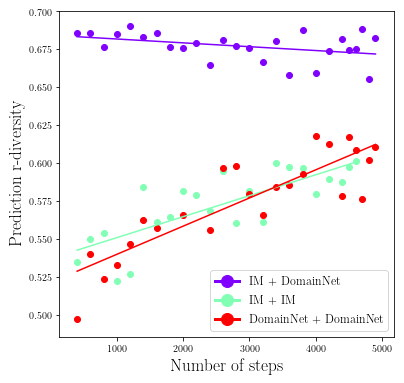

In [6]:
plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="step",
    key_y="divr_netm",
    keyclustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="lower right",
    order="1",
    list_indexes=[0, 3, 5]
)
# plot.save_fig(fig, "diwa/fig_dnim_step_dr_" + "home0" + ".pdf")


In [ ]:
plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="step",
    key_y="1-divq_netm",
    keyclustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="lower right",
    order="1",
    list_indexes=[0, 3, 5]
)
# plot.save_fig(fig, "diwa/fig_dnim_step_dq_" + "home0" + ".pdf")


In [ ]:
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="acc_ens",
    key_y="acc",
    #key_clustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="upper left",
    order=0,
    diag=True,
    kwargs={"alpha": 0.5},
    list_indexes=[0, 3, 5]
)
# plot.save_fig(fig, "diwa/fig_wa_vs_ens_home0" + ".pdf")


In [ ]:

plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="divr_netm",
    key_y="acc-acc_netm",
    #key_clustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="upper left",
    order=0,
    list_indexes=[0, 3, 5],
    kwargs={"alpha": 0.5}
)
plot.save_fig(fig, "diwa/fig_dnim_dr_gain_home0" + ".pdf")


In [ ]:

plot.MUL = 0
fig = plot.plot_key(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="1-divq_netm",
    key_y="acc-acc_netm",
    #key_clustering="step",
    #keyerror="divq_netm_std",
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="upper left",
    order=0,
    list_indexes=[0, 3, 5],
    kwargs={"alpha": 0.5}
)
plot.save_fig(fig, "diwa/fig_dnim_dq_gain_home0" + ".pdf")


In [ ]:
plot.plt.rcParams["figure.figsize"] = (5, 5)
plot.SIZE="large"
fig = plot.plot_histogram_two(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="train_divr_netm",
    key2="divr_netm",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    list_indexes=[0, 3]
)
# plot.save_fig(fig, "diwa/fig_dnim_hist_driidood_home0" + ".pdf")


In [ ]:
plot.plt.rcParams["figure.figsize"] = (5, 5)
plot.SIZE="large"
fig = plot.plot_histogram_two(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key1="train_divr_netm",
    key2="divr_netm",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    list_indexes=[0, 3, 5]
)
# plot.save_fig(fig, "diwa/fig_dnim_hist_driidood_home0" + ".pdf")


In [ ]:
plot.plt.rcParams["figure.figsize"] = (5, 5)
plot.SIZE="large"
fig = plot.plot_histogram_two(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key_x="1-train_divq_netm",
    key_y="1-divq_netm",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    list_indexes=[0, 3, 5]
)
plot.save_fig(fig, "diwa/fig_dnim_hist_dqiidood_home0" + ".pdf")


In [ ]:
labels = [
    "$\kappa=0$ and $\kappa=1$ (IM + DomainNet)",
    "$\kappa=0$ and $\kappa=0.5$",
    "$\kappa=0.5$ and $\kappa=1$",
    "$\kappa=0$ and $\kappa=0$ (IM + IM)",
    "$\kappa=0.5$ and $\kappa=0.5$",
    "$\kappa=1$ and $\kappa=1$ (DomainNet + DomainNet)",
]


In [ ]:
fig = plot.plot_histogram(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=labels,#home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key="divr_netm",
    loc="lower left",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    list_indexes=[0, 1, 2, 3, 4, 5],
    size="small"
)
plot.save_fig(fig, "diwa/fig_wadnim_hist_dr_home0" + ".pdf")


In [ ]:
fig = plot.plot_histogram(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=labels,#home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key="1-divq_netm",
    loc="lower left",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    list_indexes=[0, 1, 2, 3, 4, 5],
    size="small"
)
plot.save_fig(fig, "diwa/fig_wadnim_hist_dq_home0" + ".pdf")


In [ ]:
fig = plot.plot_histogram(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key="1-divq_netm",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    list_indexes=[0, 3, 5]
)
plot.save_fig(fig, "diwa/fig_dnim_hist_dq_home0" + ".pdf")


In [ ]:
plot.dict_key_to_label["divr_netm"] = "Prediction diversity"
fig = plot.plot_histogram(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=["Different auxiliary tasks", "", "", "Same auxiliary task"],
    key="divr_netm",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="lower left",
    list_indexes=[0, 3]
)
# plot.save_fig(
#     fig,
#     "fig_dnim_hist_dr_home0_defensephd" + ".pdf",
#     folder="/Users/alexandrerame/code_repository/dataplace/figures/ratatouille")


In [ ]:
fig = plot.plot_histogram(
    home0_div_imdn0dn1_idit_step.l + home0_div_imdn0dn1_isit_step_top2.l,
    labels=home0_div_imdn0dn1_idit_step.labels + home0_div_imdn0dn1_isit_step_top2.labels,
    key="divr_netm",
    limits={},
    lambda_filtering=lambda x: x["step"] > 200 and x.get("testenv", 0) == 0,
    loc="lower left",
    list_indexes=[0, 3, 5]
)
# plot.save_fig(fig, "diwa/fig_dnim_hist_dr_home0" + ".pdf")
